## Bike Sharing Assignment <br>

### Problem Statement:<br>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demand
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.<br>
### Business Goal:<br>
Build a model which identifies variables significant in predicting the demand for shared bikes.This will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

In [348]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from math import sqrt

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1. Data reading and understanding

In [349]:
#Importing dataset
bike_df=pd.read_csv("day.csv")

In [350]:
#Let's explore the top 5 rows
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [351]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [352]:
bike_df.shape

(730, 16)

In [353]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [354]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<b>Observation:</b>
- Except column:dteday which is object type, all other columns are either float or integer type.
- Columns categorical in nature are:  season, mnth, weathersit etc.
- There are no null values in any columns

## Step 2. Data Cleaning

#### 2.1 Check for null values

In [355]:
# Considering only those columns which have null values less than 40% in that particular column
bike_df = bike_df[bike_df.columns[((bike_df.isnull().sum())/len(bike_df)) < 0.4]]
bike_df.shape

(730, 16)

As the shape is same as of the original dataframe, there are no missing values in any of the columns 

#### 2.2 Removing redundant & unwanted columns
As observed from the data , some columns can be dropped out.

In [356]:
del_cols = ["instant","dteday","casual","registered"]
bike_df.drop(columns=del_cols, inplace=True)
bike_df.shape

(730, 12)

#### 2.3 converting columns : 'mnth', 'weekday', 'season' & 'weathersit' into categorical types

In [357]:
# Convert to 'category' data type
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')

- 2.3.1 converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter

In [358]:
bike_df["season"].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)

- converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec

In [360]:
bike_df["mnth"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}, inplace=True)


- weathersit: converting values as<br> 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>		
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

In [361]:
bike_df["weathersit"].replace({1: "Clear", 2: "Mist", 3: "Light_rain_snow", 4: "Heavy_rain_snow"}, inplace=True)


- weekday: converting values as 0:Sun, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday

In [362]:
bike_df["weekday"].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}, inplace=True)


## Step 3. Data Visualization

#### 3.1 pairplots for continuous numeric variables

<Figure size 1080x2160 with 0 Axes>

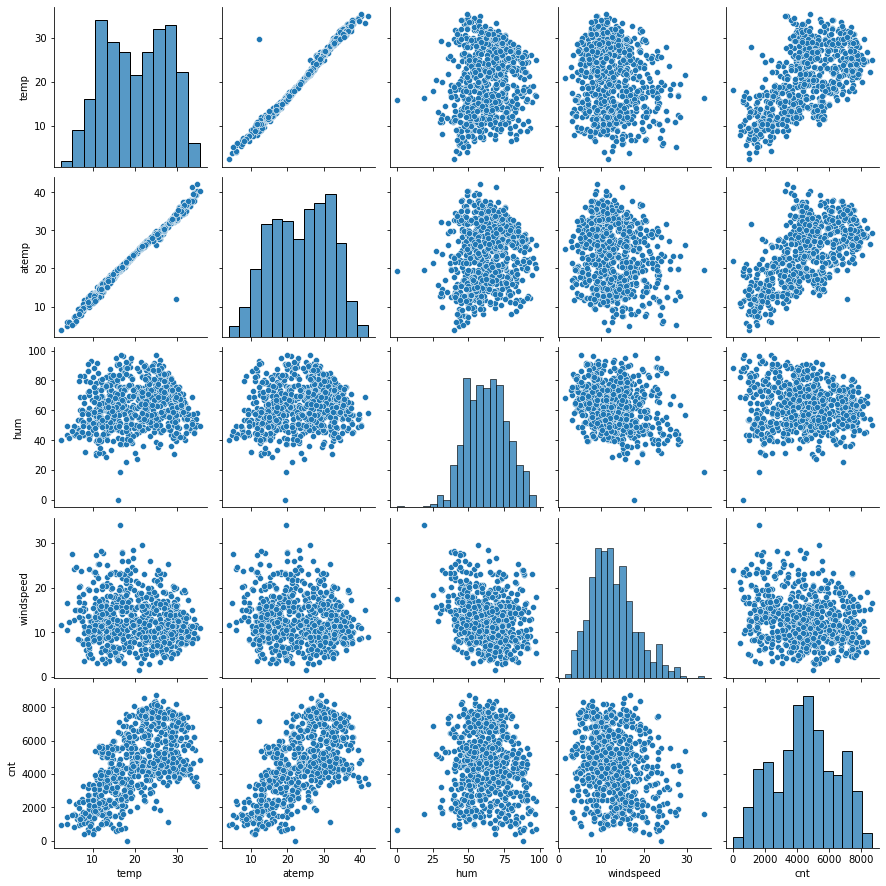

In [365]:
plt.figure(figsize = (15,30))
sns.pairplot(bike_df,vars=[ 'temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()

<b>Observation :</b>
- temp and atemp are highly correlated to cnt and also to each other

#### 3.2 Correlations for numeric variables

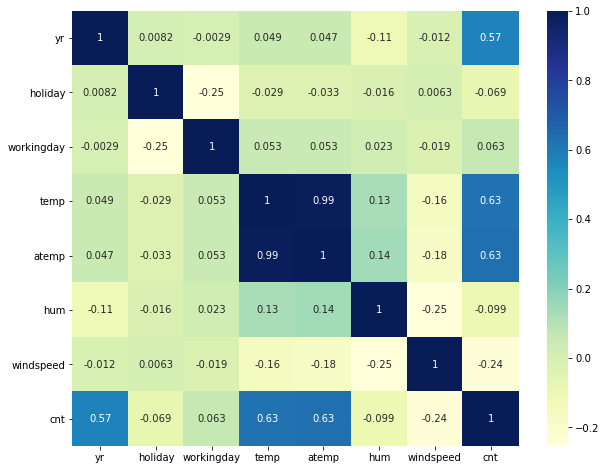

In [364]:
plt.figure(figsize = (10, 8))
sns.heatmap(bike_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### 3.3 Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

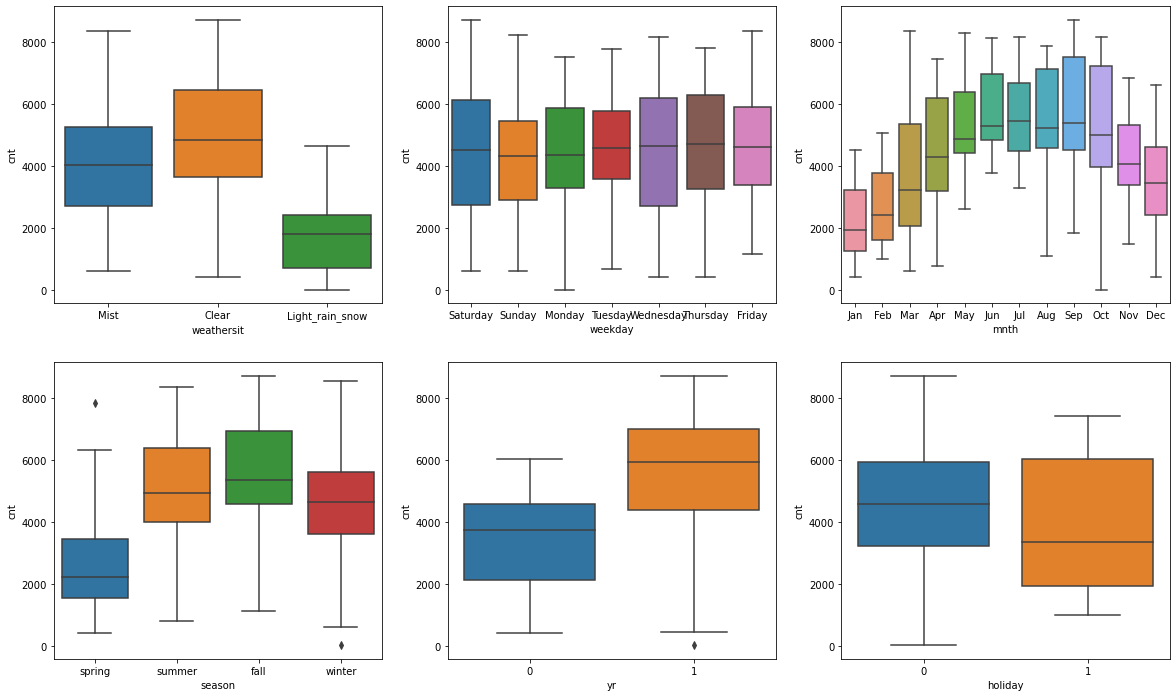

In [366]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.show()

<b>Observation:</b><br>
- Clear weather has the highest demand count
- No clear understanding for weekday
- Demand increases continously till September where it is maximum and after that it decreases.
- Season- 3:fall has highest demand
- Demand is high for 2019
- Demand decreases on holiday

## Step 4. Data Preparation for Linear Regression

#### 4.1 Create dummy variables for all categorical variables

In [367]:
## Season
season = pd.get_dummies(bike_df['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [368]:
## Weather
weather = pd.get_dummies(bike_df['weathersit'], drop_first = True)
weather.head()

,Light_rain_snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [369]:
## Month
mnth = pd.get_dummies(bike_df['mnth'], drop_first = True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [370]:
## Weekday
weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [371]:
## Merging the Dataframes
bike_df = pd.concat([bike_df,season,mnth,weather,weekday], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rain_snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [372]:
bike_df.shape

(730, 34)

In [373]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light_rain_snow', 'Mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [101]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  spring           730 non-null    uint8  
 13  summer           730 non-null    uint8  
 14  winter           730 non-null    uint8  
 15  Aug              730 non-null    uint8  
 16  Dec              730 non-null    uint8  
 17  Feb             

In [374]:
## Dropping unwanted columns
bike_df.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_df.shape

(730, 30)

<b>Observation:</b><br> - All the 30 columns are now as numeric value. We are ready for the first step of model building i.e. splitting into Train & Test dataframes.
    

## Step 5. Splitting the data into Train & Test Dataset

#### 5.1 Splitting the data

In [375]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [376]:
bike_df.shape

(730, 30)

In [377]:
bike_train.shape

(510, 30)

In [378]:
bike_test.shape

(220, 30)

In [379]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   cnt              510 non-null    int64  
 8   spring           510 non-null    uint8  
 9   summer           510 non-null    uint8  
 10  winter           510 non-null    uint8  
 11  Aug              510 non-null    uint8  
 12  Dec              510 non-null    uint8  
 13  Feb              510 non-null    uint8  
 14  Jan              510 non-null    uint8  
 15  Jul              510 non-null    uint8  
 16  Jun              510 non-null    uint8  
 17  Mar           

#### 5.2 Rescalling bike_train dataframe using MinMaxCcaler

In [382]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [383]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light_rain_snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,0,0,0,0


## Step 6. Linear Model Building

#### 6.1 Dividing into X and Y sets for the model building

In [384]:
y_train = bike_train.pop('cnt')
X_train = bike_train

#### 6.2 Use RFE to eliminate some columns

In [385]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [211]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 10),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Light_rain_snow', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 4),
 ('Saturday', True, 1),
 ('Sunday', False, 3),
 ('Thursday', False, 6),
 ('Tuesday', False, 5),
 ('Wednesday', False, 7)]

In [386]:
# storing the selected 20 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday'],
      dtype='object')

In [387]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [388]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Reusable functions during model creation

In [389]:
#Function to build a model using statsmodel api.
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [390]:
#Function to calculate VIFs
def getVif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### 6.3 Manual model development using statsmodel

##### Model 1 : Start with all variables selected by RFE

In [391]:
#VIF Check
getVif(X_train_rfe.columns)

           Features     VIF
3              temp  379.77
4             atemp  368.95
5               hum   31.79
7            spring    5.73
2        workingday    5.40
6         windspeed    5.13
9            winter    4.28
8            summer    3.59
12              Jan    2.40
18             Mist    2.33
0                yr    2.11
19         Saturday    2.01
11              Feb    1.92
15              Nov    1.88
10              Dec    1.70
13              Jul    1.61
14              May    1.59
16              Sep    1.43
17  Light_rain_snow    1.29
1           holiday    1.21


In [392]:
# Create a model with RFE features
create_model(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.28e-188
Time:                        21:06:26   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2973      0.039     

<b>Observation:</b><br>
- All the rfe variables provide a R-squared value of .852 i.e. these variables explain a 85% variance in the cnt variable.
- Both temp and atemp have high VIF values. We have to remove one of them. We will remove atemp as it has high p-value of .840

##### Model 2 : Removing the variable 'atemp' 

In [393]:
cols=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [394]:
## VIF Check
getVif(cols)

           Features    VIF
4               hum  31.74
3              temp  19.84
6            spring   5.62
2        workingday   5.40
5         windspeed   4.88
8            winter   4.12
7            summer   3.44
11              Jan   2.40
17             Mist   2.33
0                yr   2.11
18         Saturday   2.01
10              Feb   1.92
14              Nov   1.88
9               Dec   1.70
12              Jul   1.60
13              May   1.58
15              Sep   1.42
16  Light_rain_snow   1.28
1           holiday   1.21


In [395]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.20e-189
Time:                        21:07:20   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2970      0.038     

<b>Observation:</b>
- R-squared value of .852 is quite good
- For next model we will drop 'hum' based oh high VIF value

##### Model 3 : Removing the variable 'hum' 

In [396]:
cols=['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [397]:
## VIF Check
getVif(cols)

           Features   VIF
3              temp  7.47
2        workingday  5.36
4         windspeed  4.82
5            spring  4.57
7            winter  3.08
6            summer  2.92
10              Jan  2.24
0                yr  2.09
17         Saturday  2.00
9               Feb  1.89
13              Nov  1.85
11              Jul  1.60
8               Dec  1.59
16             Mist  1.59
12              May  1.58
14              Sep  1.36
1           holiday  1.21
15  Light_rain_snow  1.09


In [398]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.51e-186
Time:                        21:08:04   Log-Likelihood:                 516.82
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     491   BIC:                            -915.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2216      0.034     

<b>Observation:</b>
- We will remove 'temp' based on high VIF values

##### Model 4 : Removing the variable 'temp'  

In [399]:
cols=['yr', 'holiday', 'workingday', 'May', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [400]:
## VIF Check
getVif(cols)

           Features   VIF
5            spring  4.53
4         windspeed  4.35
2        workingday  3.85
7            winter  3.07
6            summer  2.91
10              Jan  2.17
0                yr  1.92
9               Feb  1.86
12              Nov  1.82
16         Saturday  1.70
15             Mist  1.58
3               May  1.55
8               Dec  1.55
11              Jul  1.30
13              Sep  1.28
1           holiday  1.15
14  Light_rain_snow  1.09


In [401]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     122.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.21e-164
Time:                        21:08:30   Log-Likelihood:                 460.52
No. Observations:                 510   AIC:                            -885.0
Df Residuals:                     492   BIC:                            -808.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5502      0.019     

<b>Observation:</b>
- The variable 'holiday' has high p-vale of 0.251. <br>
- The variable 'winter' has high p-vale of  0.448 .
- The variable 'Jul' has high p-vale of 0.414.
- We will remove 'holiday' as it has high negative coeffiencient along with high p-value

##### Model 5 : Removing the variable 'holiday'  

In [402]:
cols=['yr', 'workingday', 'May', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [403]:
## VIF Check
getVif(cols)

           Features   VIF
4            spring  4.50
3         windspeed  4.30
1        workingday  3.56
6            winter  3.05
5            summer  2.88
9               Jan  2.17
0                yr  1.91
8               Feb  1.86
11              Nov  1.79
15         Saturday  1.63
14             Mist  1.58
2               May  1.55
7               Dec  1.55
10              Jul  1.29
12              Sep  1.25
13  Light_rain_snow  1.09


In [404]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.35e-165
Time:                        21:09:30   Log-Likelihood:                 459.84
No. Observations:                 510   AIC:                            -885.7
Df Residuals:                     493   BIC:                            -813.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5454      0.018     

<b>Observation:</b>
- The variable 'winter' has high p-vale of  0.465 .
- The variable 'Jul' has high p-vale of 0.430.
- we will remove 'Jul' as it has high negative coeffiencient along with high p-value

##### Model 6 : Removing the variable 'Jul'  

In [405]:
cols=['yr', 'workingday', 'May', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [406]:
## VIF Check
getVif(cols)

           Features   VIF
4            spring  4.23
3         windspeed  4.12
1        workingday  3.32
6            winter  2.88
5            summer  2.60
9               Jan  2.17
0                yr  1.88
8               Feb  1.86
10              Nov  1.79
13             Mist  1.58
14         Saturday  1.57
2               May  1.55
7               Dec  1.55
11              Sep  1.20
12  Light_rain_snow  1.09


In [407]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.09e-166
Time:                        21:10:15   Log-Likelihood:                 459.51
No. Observations:                 510   AIC:                            -887.0
Df Residuals:                     494   BIC:                            -819.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5392      0.017     

<b>Observation:</b>
- The variable 'winter' has high p-vale of  0.636 <br>
- we will remove 'winter'

##### Model 7 : Removing the variable 'winter'  

In [408]:
cols=['yr', 'workingday', 'May', 'windspeed',
       'spring', 'summer', 'Dec', 'Feb', 'Jan', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [409]:
## VIF Check
getVif(cols)

           Features   VIF
3         windspeed  3.96
4            spring  3.66
1        workingday  3.22
5            summer  2.37
8               Jan  2.13
0                yr  1.87
7               Feb  1.84
2               May  1.55
12             Mist  1.55
13         Saturday  1.54
9               Nov  1.22
6               Dec  1.21
10              Sep  1.20
11  Light_rain_snow  1.07


In [410]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.48e-167
Time:                        21:10:44   Log-Likelihood:                 459.40
No. Observations:                 510   AIC:                            -888.8
Df Residuals:                     495   BIC:                            -825.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5368      0.016     

##### Model 8 : Removing the variable  'Jan' and 'Feb'

In [411]:
cols=['yr', 'workingday', 'May', 'windspeed',
       'spring', 'summer', 'Dec', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [412]:
## VIF Check
getVif(cols)

           Features   VIF
3         windspeed  3.92
1        workingday  3.21
5            summer  2.37
0                yr  1.87
4            spring  1.74
2               May  1.55
10             Mist  1.54
11         Saturday  1.54
7               Nov  1.22
8               Sep  1.20
6               Dec  1.14
9   Light_rain_snow  1.07


In [413]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     150.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.28e-157
Time:                        21:11:00   Log-Likelihood:                 430.18
No. Observations:                 510   AIC:                            -834.4
Df Residuals:                     497   BIC:                            -779.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5252      0.017     

##### Model 9 : Adding the variable  'temp'

In [414]:
cols=['yr', 'temp','workingday', 'May', 'windspeed',
       'spring', 'summer', 'Dec', 'Nov',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [415]:
## VIF Check
getVif(cols)

           Features   VIF
1              temp  5.64
4         windspeed  4.60
2        workingday  4.57
6            summer  2.37
0                yr  2.06
5            spring  2.01
12         Saturday  1.81
3               May  1.58
11             Mist  1.54
8               Nov  1.24
9               Sep  1.24
7               Dec  1.15
10  Light_rain_snow  1.08


In [416]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.75e-180
Time:                        21:11:16   Log-Likelihood:                 487.09
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     496   BIC:                            -886.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2869      0.026     

<b>Observation:</b>
   - The variable 'Nov' has high p-vale of  0.753 <br>
   - The variable 'Dec' has high p-vale of  0.390<br>
   - The variable 'May' has high p-vale of  0.183
   - We will remove 'May','Nov' and 'Dec'

##### Model 10 : Removing the variable  'Nov,'Dec' and 'May'

In [417]:
cols=['yr', 'temp','workingday', 'windspeed',
       'spring', 'summer',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [418]:
## VIF Check
getVif(cols)

          Features   VIF
1             temp  5.38
2       workingday  4.30
3        windspeed  4.18
0               yr  2.03
4           spring  1.82
9         Saturday  1.74
5           summer  1.61
8             Mist  1.52
6              Sep  1.21
7  Light_rain_snow  1.07


In [419]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.27e-183
Time:                        21:11:57   Log-Likelihood:                 485.87
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     499   BIC:                            -903.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2747      0.021     

<b>Observation:</b>
- 'summer' has high p-value of .461. So we will remove summer

##### Model 11 : Removing the variable  'summer

In [420]:
cols=['yr', 'temp','workingday', 'windspeed',
       'spring',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

In [421]:
## VIF Check
getVif(cols)

          Features   VIF
1             temp  5.35
2       workingday  4.25
3        windspeed  3.92
0               yr  2.03
8         Saturday  1.73
4           spring  1.63
7             Mist  1.51
5              Sep  1.15
6  Light_rain_snow  1.07


In [422]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.26e-184
Time:                        21:12:52   Log-Likelihood:                 485.59
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     500   BIC:                            -908.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2768      0.020     

<b>Observation</b>
- 'temp' which is a very important variable still have high VIF. Lets try to remove 'spring' and add'summer' and 'winter' back

##### Model 12 : Removing the variable  'spring' and adding 'summer' and 'winter'

In [442]:
cols=['yr', 'temp','workingday', 'windspeed',
       'summer','winter',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']
X_train_sm12=X_train[cols]
X_train_lm12 = sm.add_constant(X_train_sm12)

In [443]:
## VIF Check
getVif(cols)

          Features   VIF
1             temp  4.76
2       workingday  4.04
3        windspeed  3.44
0               yr  2.02
9         Saturday  1.69
4           summer  1.57
8             Mist  1.53
5           winter  1.40
6              Sep  1.20
7  Light_rain_snow  1.08


In [444]:
lr12=create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.13e-188
Time:                        21:25:01   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

<b>Observation</b>
- With this all the VIF values are below 5<br>
- All the p-values are equal to 0.<br>
- The R-squared value is .835 which means these variables explains 83% of variance in 'cnt variable<br>
- <b>This seems to be the best model</b>.<br>
- Lets add some columns which were removed by RFE such as 'Sunday'


##### Model 13 : Adding the variable  'Sunday' in place of 'Saturday'

In [431]:
cols=['yr', 'temp','workingday', 'windspeed',
       'summer','winter',
       'Sep', 'Light_rain_snow', 'Mist', 'Sunday']

In [432]:
## VIF Check
getVif(cols)

          Features   VIF
1             temp  4.81
2       workingday  3.85
3        windspeed  3.32
0               yr  2.02
9           Sunday  1.59
4           summer  1.57
8             Mist  1.51
5           winter  1.41
6              Sep  1.20
7  Light_rain_snow  1.08


In [433]:
create_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.19e-185
Time:                        21:18:02   Log-Likelihood:                 492.07
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1249      0.019     

#### Observation<br>
- This model increased p-value of workingday<br>
- So, it would not be a good factor to add. The reason could be that people choose bike sharing on working days which is not related to Sunday which is a holiday.<br>
- Based on this observation <b>Model 12<b> will be our final model for which we will evaluate model

## Step 7. Model Interpretation

##### 7.1. Model Coeffiecients

In [445]:
lr12.params

const              0.075009
yr                 0.233139
temp               0.549892
workingday         0.056117
windspeed         -0.155203
summer             0.088621
winter             0.130655
Sep                0.097365
Light_rain_snow   -0.287090
Mist              -0.080022
Saturday           0.067500
dtype: float64

##### 7.2. Model equation

#### cnt=0.075009 + (0.233139 x yr) + (0.549892 x temp)+ (0.056117 x workingday) − (0.155203 x windspeed) + (0.088621 x summer) + (0.130655 x winter) + (0.097365 x Sep) + (0.067500 x Saturday) − (0.080022 x Misty) − (0.287090 x Light_rain_snow)

##### 7.3. Model Interpretation

- <b>const</b> : In the absence of all other predictor variables, the bike rental(cnt) can increase by 0.075009 units<br>
- <b>yr</b> : A unit increase in yr variable, will increase the bike rental numbers by 0.233139 units<br>
- <b>temp</b> : A unit increase in temp variable, will increase the bike rental numbers by 0.549892 units<br>
- <b>workingday</b> : A unit increase in workingday variable, will increase the bike rental numbers by 0.056117 units<br>
- <b>windspeed</b> : A unit increase in windspeed variable will decrease the bike rental numbers by 0.155203 units<br>
- <b>summer</b> : A unit increase in summer variable, will increase the bike rental numbers by 0.088621 units<br>
- <b>winter</b> : A unit increase in winter variable, will increase the bike rental numbers by 0.130655 units<br>
- <b>Sep</b> : A unit increase in Sep variable will increase the bike rental numbers by 0.097365 units
- <b>Saturday</b> : A unit increase in Saturday variable, will increase the bike rental numbers by 0.067500 units<br>
- <b>Misty</b> : A unit increase in Misty variable will decrease the bike rental numbers by 0.080022 units<br>
- <b>Light_rain_snow</b> : A unit increase in Light_rain_snow variable will decrease the bike rental numbers by 0.287090 units<br>




##### 7.4 F-Staitsics :

- F-statistic:253.0
- Prob (F-statistic):          3.13e-188
- The F-Statistics value :253 and the p-value of '~0.0000' states that the overall model is significant

## Step 8. Residual Analysis Of Training Data

lets see if this model satisfies the assumptions of Linear Regression model

##### 8.1 Error terms are normally distributed with mean zero (not X, Y)

In [446]:
y_train_pred = lr12.predict(X_train_lm12)

Text(0.5, 0, 'Errors')

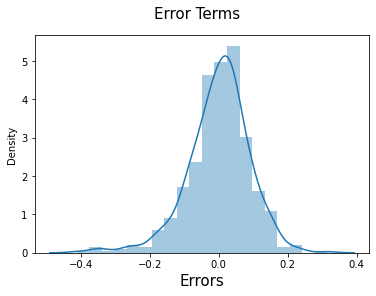

In [447]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)        
plt.xlabel('Errors', fontsize = 15)  

<b>Observation</b>
- Residuals are normally distributed

##### 8.2 Homoscedasticity

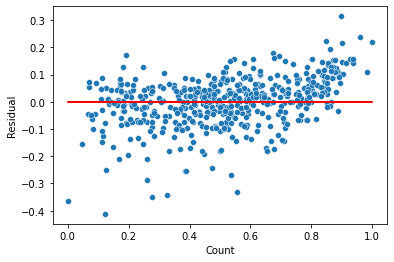

In [448]:
y_train_pred = lr12.predict(X_train_lm12)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<b>Observation</b>
- No visible pattern in residuals

##### 8.3 Independence of residuals

In [449]:
print('The Durbin-Watson value for Final Model lr 12 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))


The Durbin-Watson value for Final Model lr 12 is 2.0885


<b>Observation</b>
- The residuals are independent

## Step 9: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eleventh model.

##### 9.1 Applying the scaling on the test sets

In [436]:
## Rescalling bike_test dataframe using MinMaxCcaler
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [437]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light_rain_snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,0,0,1,0,0


##### 9.2 Dividing into X_test and y_test

In [438]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [450]:
# Selecting variables part of final model : lr11
cols=['yr', 'temp','workingday', 'windspeed',
       'summer','winter',
       'Sep', 'Light_rain_snow', 'Mist', 'Saturday']

X_test=X_test[cols]

# Adding constant variable to test dataframe
X_test_lm12 = sm.add_constant(X_test)

X_test_lm12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            220 non-null    float64
 1   yr               220 non-null    int64  
 2   temp             220 non-null    float64
 3   workingday       220 non-null    int64  
 4   windspeed        220 non-null    float64
 5   summer           220 non-null    uint8  
 6   winter           220 non-null    uint8  
 7   Sep              220 non-null    uint8  
 8   Light_rain_snow  220 non-null    uint8  
 9   Mist             220 non-null    uint8  
 10  Saturday         220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


##### 9.3 Making predictions using the final model (lr12)

In [451]:
y_pred = lr12.predict(X_test_lm11)

##### 9.4 plotting y_test and y_pred

Text(0, 0.5, 'y_pred')

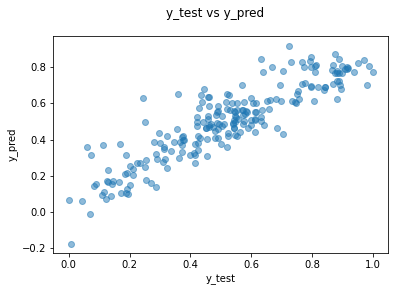

In [452]:
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

##### 9.5 R2 Value Calculation for bike_test

In [453]:
r2 = round(r2_score(y_test, y_pred),3)
r2

0.788

##### 9.6 Adjusted R2 Value Calculation for bike_test

In [454]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of predictors
p = X_test.shape[1]

# Finding Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),3)
adjusted_r2

0.778

##### 9.7 Calculating RMSE

In [455]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),3)
RMSE

0.11

#### Calculating Mean Absolute Error

In [456]:
MAE = round(mean_absolute_error(y_test, y_pred),3)
MAE

0.086

#### Observation: 
- Train Data
    - Rsquared: 0.835
    - Adj. Rsquared:0.832
- Test Data
    - Rsquared: 0.786
    - Adj. Rsquared:0.778
- The <b>Root Mean Squared Error</b> value for the test dataset based on final model is 0.093
- The <b>Mean Absolute Error</b> is 0.0714<br>
### This indicates that the model 12 is really good.

## Model Outcome Summary
As per the final model, the top 5 predictor variables that influences bike booking are:

- Temperature (Temp)
    - It has the most significant impact on bike rentals
- Windspeed
    - This creates a negative impact on bike renting as people do not opt to take a bike when the windspeed is high.
- Light Rain & Snow (weathersit =3)
    - This creates a negative impact on bike renting as people do not opt to take a bike in such a weather.
- Year (yr)
    - Rental increase with every year
- Sep 
    - It is month with high rentals, so company should promote more advertisments in this month
    
- As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.</b>
<b>
- It is recommended to give utmost importance to these variables while planning to achieve maximum bike rental booking.
